In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import xgboost as xgb 
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,median_absolute_error

from sklearn.model_selection import train_test_split, KFold, cross_val_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import learning_curve

from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


In [16]:
# https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/code?datasetId=1381830&sortBy=voteCount

dataset = '/workspaces/predictive_maintenance/data/other/boston.csv'

df = pd.read_csv(dataset)

Attribute Information
Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

In [17]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
features = ['CRIM', 'ZN', 'INDUS',  'NOX',  'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO',  'LSTAT']

target = 'MEDV'

# Cross validation


In [20]:

X = df[features]
y = df[target]

# Train-test split 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo en el train set
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo en el test set
test_score = model.score(X_test, y_test)
print(f"Test score: {test_score}")

# K-Fold cross-validation con k = 5
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Entrenar y evaluar el modelo con K-Fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf)
print(f"K-Fold cross-validation scores: {cv_scores}")

# Calcular la media de los puntajes de validación cruzada
mean_cv_score = cv_scores.mean()
print(f"Mean K-Fold cross-validation score: {mean_cv_score}")

Test score: 0.6951161266391407
K-Fold cross-validation scores: [0.71392705 0.65043564 0.67539639 0.68426737 0.610731  ]
Mean K-Fold cross-validation score: 0.6669514899129959


In [32]:
def compare_validation_methods(df, features, target, k, metric, train_size, train_color, test_color, kfold_color):
    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # 
    if metric == 'mse':
        metric_function = mean_squared_error
    elif metric == 'mae':
        metric_function = mean_absolute_error
    elif metric == 'r2':
        metric_function = r2_score
    else:
        raise ValueError("Unsupported metric. Supported metrics are 'mse', 'mae', and 'r2'.")

    train_error = metric_function(y_train, y_train_pred)
    test_error = metric_function(y_test, y_test_pred)

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    kfold_errors = []
    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

        model_fold = LinearRegression()
        model_fold.fit(X_train_fold, y_train_fold)

        y_val_pred = model_fold.predict(X_val_fold)
        val_error = metric_function(y_val_fold, y_val_pred)

        kfold_errors.append(val_error)

    plt.figure(figsize=(12, 6))

    plt.bar(1, train_error, color=train_color, label='Train Error (train-test split)')
    plt.bar(2, test_error, color=test_color, label='Test Error (train-test split)')

    x_pos = np.arange(3, 3 + k)
    plt.bar(x_pos, kfold_errors, color=kfold_color, label='Validation Error (K-Fold)')

    plt.xticks(list(range(1, 3 + k)), ['Train', 'Test'] + [f'Fold {i+1}' for i in range(k)])
    plt.ylabel(metric.upper())
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'Comparing Errors: Train-Test Split vs K-Fold Cross-Validation ({metric.upper()})')
    plt.show()





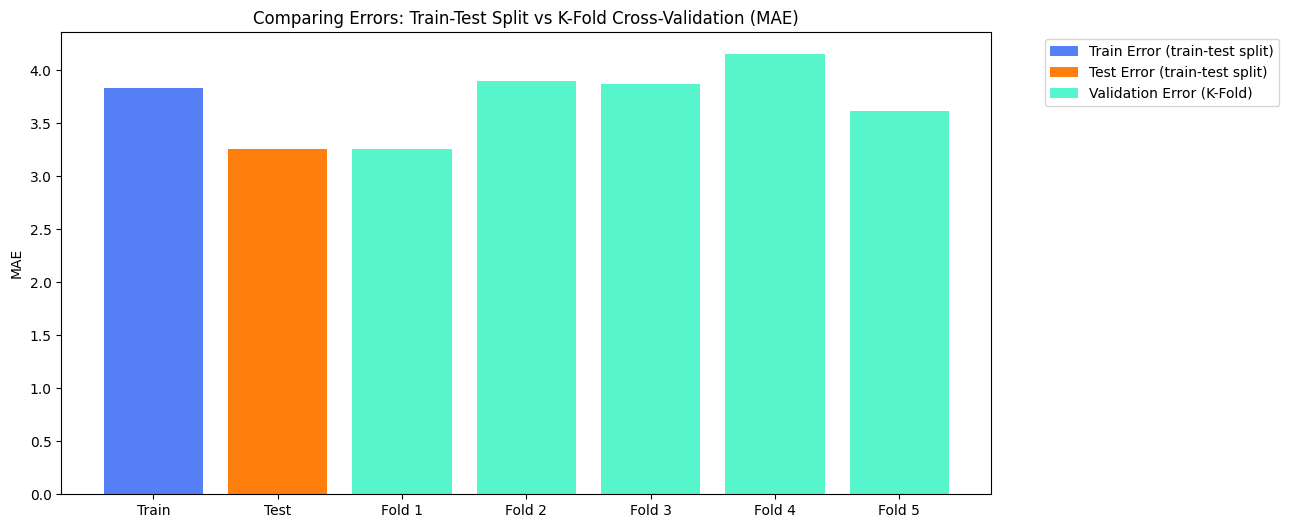

In [39]:
# mse  mae  r2

compare_validation_methods(
    df, 
    features, 
    target, 
    k=5, 
    metric='mae',   
    train_size=0.8, 
    train_color='#567EF5', 
    test_color='#FF7F0E', 
    kfold_color='#56F5CB'
)

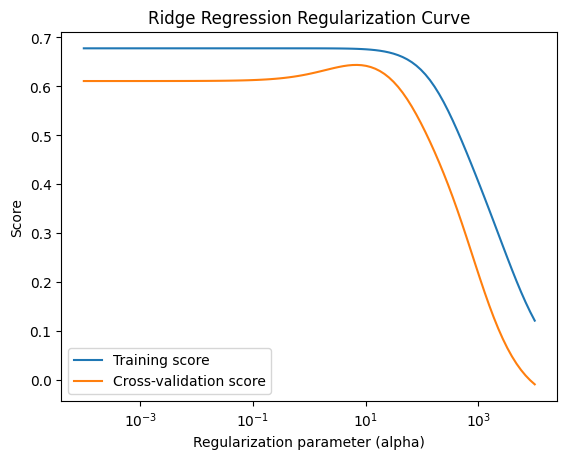

In [8]:
features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
target = 'MEDV'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a range of regularization parameters (alpha values)
alphas = np.logspace(-4, 4, 100)

# Function to plot the learning curve
def plot_regularization_curve():
    train_scores = []
    test_scores = []
    
    for alpha in alphas:
        model = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
        model.fit(X_train, y_train)
        
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(np.mean(cross_val_score(model, X_test, y_test, cv=5)))
    
    plt.plot(alphas, train_scores, label='Training score')
    plt.plot(alphas, test_scores, label='Cross-validation score')
    
    plt.xscale('log')
    plt.xlabel('Regularization parameter (alpha)')
    plt.ylabel('Score')
    plt.title('Ridge Regression Regularization Curve')
    plt.legend(loc='best')
    plt.show()

# Plot the regularization curve
plot_regularization_curve()

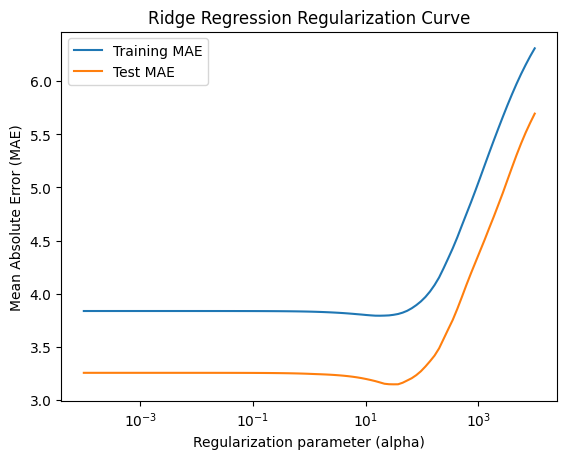

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a range of regularization parameters (alpha values)
alphas = np.logspace(-4, 4, 100)

# Function to plot the regularization curve
def plot_regularization_curve():
    train_scores = []
    test_scores = []
    
    for alpha in alphas:
        model = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_scores.append(mean_absolute_error(y_train, y_train_pred))
        test_scores.append(mean_absolute_error(y_test, y_test_pred))
    
    plt.plot(alphas, train_scores, label='Training MAE')
    plt.plot(alphas, test_scores, label='Test MAE')
    
    plt.xscale('log')
    plt.xlabel('Regularization parameter (alpha)')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Ridge Regression Regularization Curve')
    plt.legend(loc='best')
    plt.show()

# Plot the regularization curve
plot_regularization_curve()

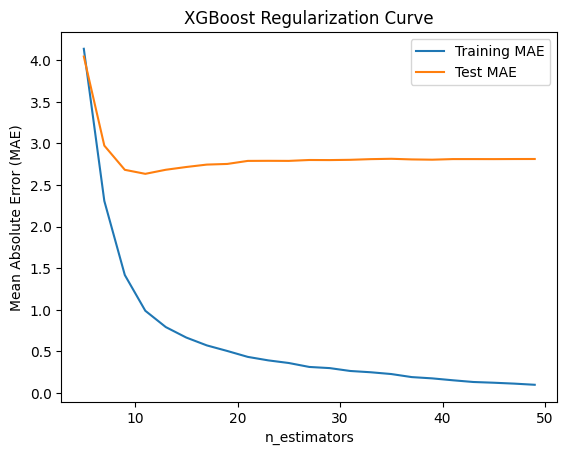

In [74]:
def plot_regularization_curve(model_name, model, param_name, param_values):
    train_scores = []
    test_scores = []
    
    for param_value in param_values:
        model.set_params(**{param_name: param_value})
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_scores.append(mean_absolute_error(y_train, y_train_pred))
        test_scores.append(mean_absolute_error(y_test, y_test_pred))
    
    plt.plot(param_values, train_scores, label='Training MAE')
    plt.plot(param_values, test_scores, label='Test MAE')
    
    plt.xlabel(f'{param_name}')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title(f'{model_name} Regularization Curve')
    plt.legend(loc='best')
    plt.show()

# Set a range of numbers of trees for XGBoost
num_trees = np.arange(5, 50, 2)

# XGBoost example with the number of trees
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1,max_depth=8)
plot_regularization_curve('XGBoost', xgb_model, 'n_estimators', num_trees)

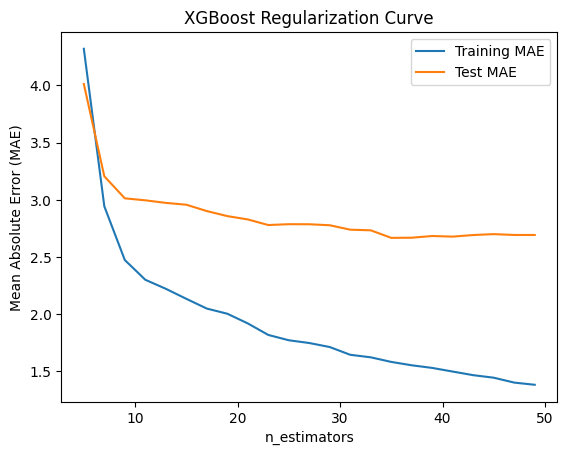

In [73]:
# Set a range of numbers of trees for XGBoost
num_trees = np.arange(5, 50, 2)

# XGBoost example with the number of trees
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1,max_depth=3)
plot_regularization_curve('XGBoost', xgb_model, 'n_estimators', num_trees)

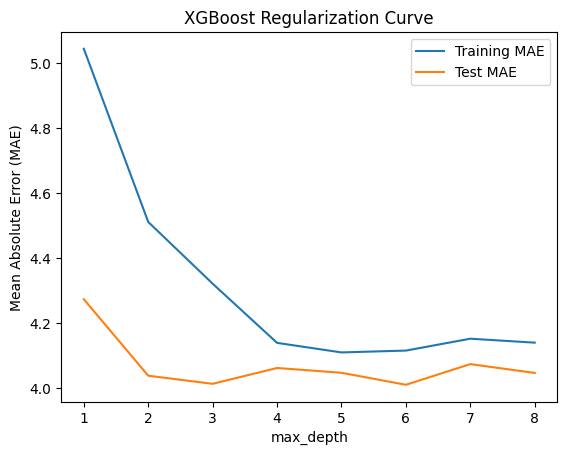

In [67]:
# Set a range of numbers of trees for XGBoost
# Set a range of tree depths for XGBoost
tree_depths = np.arange(1, 9, 1)

# XGBoost example with the number of trees
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators= 5, n_jobs=-1)
plot_regularization_curve('XGBoost', xgb_model, 'max_depth', tree_depths)


In [88]:
#reg_alpha  ¿ 


reg_lambdas = np.arange(0.1, 15, 0.2)



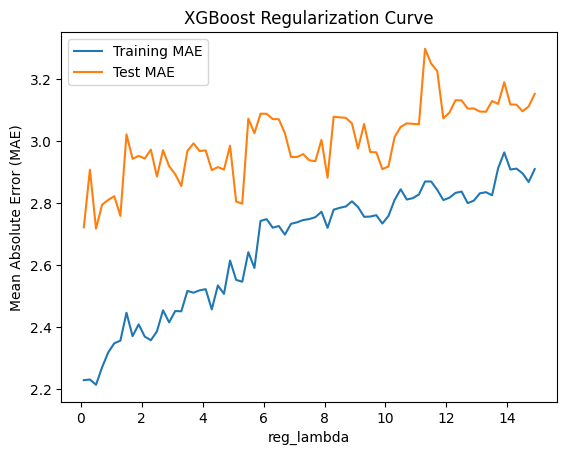

In [89]:

# XGBoost example with the number of trees # 
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators= 10, n_jobs=-1,max_depth=3)
plot_regularization_curve('XGBoost', xgb_model, 'reg_lambda', reg_lambdas)


In [49]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

In [52]:
def perform_recursive_feature_elimination(model, X, y, n_features_to_select):
    rfe = RFECV(estimator=model, n_features_to_select=n_features_to_select)
    rfe.fit(X, y)

    selected_features = X.columns[rfe.support_]
    feature_ranking = rfe.ranking_

    return selected_features, feature_ranking

In [59]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

X = df[features]
y = df[target]

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1)

selector = RFECV(model, step=1, cv=5)
selector = selector.fit(X, y)
selector.support_


selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])